<a href="https://colab.research.google.com/github/Mitalivaidya66/MACHINE-LEARNING/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Required Libraries
!pip install imbalanced-learn

In [5]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
# Upload the file
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [3]:
# Import necessary library
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display the first few rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

DATA PREPROCESSING

In [6]:
# Normalize the 'Amount' feature
scaler = StandardScaler()
data['Normalized_Amount'] = scaler.fit_transform(data[['Amount']])
data.drop(['Amount', 'Time'], axis=1, inplace=True)  # Drop unnecessary columns

In [7]:
# Check class distribution
print("Class Distribution Before Resampling:")
print(data['Class'].value_counts())

Class Distribution Before Resampling:
Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
# Handle Class Imbalance using SMOTE
X = data.drop('Class', axis=1)
y = data['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())

Class Distribution After Resampling:
Class
0    284315
1    284315
Name: count, dtype: int64


In [9]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [10]:
# Step 6: Train the Model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Precision: 0.9997894293535481
Recall: 1.0
F1 Score: 0.9998947035906076
Confusion Matrix:
[[56738    12]
 [    0 56976]]


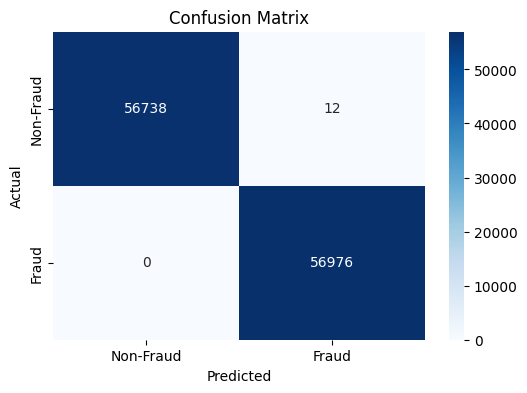

In [12]:
# Step 8: Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# Step 9: Anomaly Detection with Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X)

anomalies = iso_forest.predict(X)
anomalies = [1 if x == -1 else 0 for x in anomalies]

print(f"Number of anomalies detected: {sum(anomalies)}")

Number of anomalies detected: 285


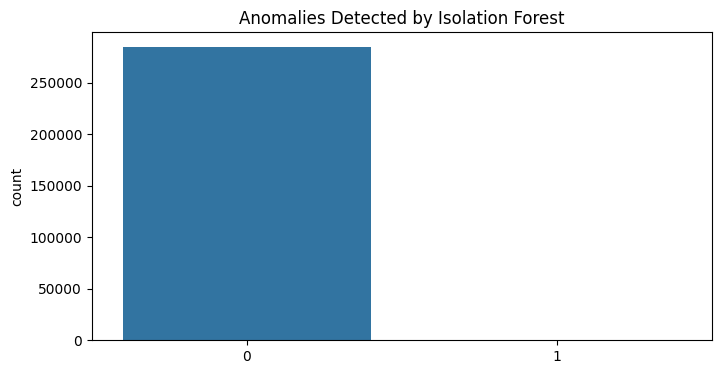

In [14]:
# Visualize Distribution of Anomalies
plt.figure(figsize=(8, 4))
sns.countplot(x=anomalies)
plt.title("Anomalies Detected by Isolation Forest")
plt.show()